In [1]:
import pandas as pd

In [2]:
weather = pd.read_csv("weather.csv", index_col = "DATE")
print(weather)

                STATION                              NAME  ACMH   ACSH   AWND  \
DATE                                                                            
1970-01-01  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  80.0   90.0    NaN   
1970-01-02  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  30.0   20.0    NaN   
1970-01-03  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  80.0  100.0    NaN   
1970-01-04  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  10.0   20.0    NaN   
1970-01-05  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  30.0   10.0    NaN   
...                 ...                               ...   ...    ...    ...   
2022-10-17  USW00094789  JFK INTERNATIONAL AIRPORT, NY US   NaN    NaN   9.62   
2022-10-18  USW00094789  JFK INTERNATIONAL AIRPORT, NY US   NaN    NaN  12.08   
2022-10-19  USW00094789  JFK INTERNATIONAL AIRPORT, NY US   NaN    NaN  14.99   
2022-10-20  USW00094789  JFK INTERNATIONAL AIRPORT, NY US   NaN    NaN  16.78   
2022-10-21  USW00094789  JFK

In [3]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
null_pct

STATION    0.000000
NAME       0.000000
ACMH       0.501478
ACSH       0.501426
AWND       0.265256
FMTM       0.475087
PGTM       0.363872
PRCP       0.000000
SNOW       0.000000
SNWD       0.000104
TAVG       0.680406
TMAX       0.000000
TMIN       0.000000
TSUN       0.998393
WDF1       0.501685
WDF2       0.498678
WDF5       0.502981
WDFG       0.734484
WDFM       0.999948
WESD       0.685228
WSF1       0.501530
WSF2       0.498678
WSF5       0.503033
WSFG       0.613055
WSFM       0.999948
WT01       0.630217
WT02       0.935034
WT03       0.933271
WT04       0.982579
WT05       0.981127
WT06       0.990615
WT07       0.994400
WT08       0.796962
WT09       0.992741
WT11       0.999274
WT13       0.886711
WT14       0.954010
WT15       0.997822
WT16       0.658993
WT17       0.996889
WT18       0.939493
WT21       0.999741
WT22       0.997459
WV01       0.999948
dtype: float64

In [4]:
valid_columns = weather.columns[null_pct < .05]
print(valid_columns)

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')


In [5]:
core_weather = weather[valid_columns].copy()
print(core_weather)

                STATION                              NAME  PRCP  SNOW  SNWD  \
DATE                                                                          
1970-01-01  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  0.00   0.0   0.0   
1970-01-02  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  0.00   0.0   0.0   
1970-01-03  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  0.02   0.0   0.0   
1970-01-04  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  0.00   0.0   0.0   
1970-01-05  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  0.00   0.0   0.0   
...                 ...                               ...   ...   ...   ...   
2022-10-17  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  0.08   0.0   0.0   
2022-10-18  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  0.00   0.0   0.0   
2022-10-19  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  0.00   0.0   0.0   
2022-10-20  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  0.00   0.0   0.0   
2022-10-21  USW00094789  JFK INTERNATIONAL AIRPORT, 

In [6]:
#Finding null values
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

STATION    0.000000
NAME       0.000000
PRCP       0.000000
SNOW       0.000000
SNWD       0.000104
TMAX       0.000000
TMIN       0.000000
dtype: float64

In [8]:
core_weather["SNOW"].value_counts()

SNOW
0.0     18590
0.1        95
0.3        63
0.2        62
0.4        39
        ...  
10.8        1
9.0         1
6.4         1
6.1         1
9.3         1
Name: count, Length: 92, dtype: int64

In [9]:
del core_weather["SNOW"]

In [10]:
core_weather["SNWD"].value_counts()

SNWD
0.0     18313
1.0       223
2.0       189
3.0        98
4.0        61
1.2        50
6.0        46
5.0        44
7.0        27
8.0        26
5.1        21
9.0        18
3.1        17
7.1        17
11.0       15
10.0       13
3.9        13
5.9        13
7.9        12
9.1        11
12.0       11
14.0        9
9.8         8
13.0        5
17.0        4
19.0        3
16.0        3
22.0        3
15.0        2
26.0        2
28.0        2
18.0        2
21.0        2
23.0        1
11.8        1
Name: count, dtype: int64

In [11]:
del core_weather["SNWD"]

In [12]:
core_weather[pd.isnull(core_weather["PRCP"])]

,STATION,NAME,PRCP,TMAX,TMIN
DATE,,,,,


In [13]:
core_weather.loc["2013-12-15",:]

STATION                         USW00094789
NAME       JFK INTERNATIONAL AIRPORT, NY US
PRCP                                   0.82
TMAX                                     47
TMIN                                     33
Name: 2013-12-15, dtype: object

In [15]:
core_weather["PRCP"].value_counts() / core_weather.shape[0]

PRCP
0.00    0.671955
0.01    0.030072
0.02    0.021206
0.03    0.015347
0.04    0.013066
          ...   
2.81    0.000052
3.92    0.000052
2.70    0.000052
2.18    0.000052
3.24    0.000052
Name: count, Length: 271, dtype: float64

In [18]:
core_weather["PRCP"] = core_weather["PRCP"].fillna(0)

In [19]:
core_weather.apply(pd.isnull).sum()

STATION    0
NAME       0
PRCP       0
TMAX       0
TMIN       0
dtype: int64

In [20]:
core_weather[pd.isnull(core_weather["TMIN"])]

,STATION,NAME,PRCP,TMAX,TMIN
DATE,,,,,


In [21]:
core_weather.loc["2011-12-18":"2011-12-28"]

,STATION,NAME,PRCP,TMAX,TMIN
DATE,,,,,
2011-12-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,31,23
2011-12-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,48,21
2011-12-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,48,40
2011-12-21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.12,59,40
2011-12-22,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.06,60,48
2011-12-23,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.86,51,36
2011-12-24,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,37,27
2011-12-25,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,48,26
2011-12-26,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,48,33


In [24]:
## core_weather = core_weather.fillna(method="ffill")

In [23]:
core_weather.apply(pd.isnull).sum()

STATION    0
NAME       0
PRCP       0
TMAX       0
TMIN       0
dtype: int64

In [25]:
# Check for missing value defined in data documentation
core_weather.apply(lambda x: (x == 9999).sum())

STATION    0
NAME       0
PRCP       0
TMAX       0
TMIN       0
dtype: int64

In [26]:
core_weather.dtypes

STATION     object
NAME        object
PRCP       float64
TMAX         int64
TMIN         int64
dtype: object

In [27]:
core_weather.index

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15', '2022-10-16',
       '2022-10-17', '2022-10-18', '2022-10-19', '2022-10-20', '2022-10-21'],
      dtype='object', name='DATE', length=19287)

In [28]:
core_weather.index = pd.to_datetime(core_weather.index)
core_weather.index

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15',
               '2022-10-16', '2022-10-17', '2022-10-18', '2022-10-19',
               '2022-10-20', '2022-10-21'],
              dtype='datetime64[ns]', name='DATE', length=19287, freq=None)

In [29]:
core_weather.index.year

Index([1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970, 1970,
       ...
       2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
      dtype='int32', name='DATE', length=19287)

<Axes: xlabel='DATE'>

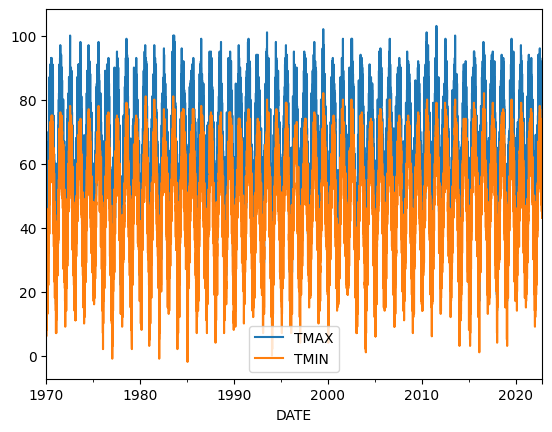

In [31]:
core_weather[["TMAX", "TMIN"]].plot()

In [32]:
core_weather.index.year.value_counts().sort_index()

DATE
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    294
Name: count, dtype: int64

<Axes: xlabel='DATE'>

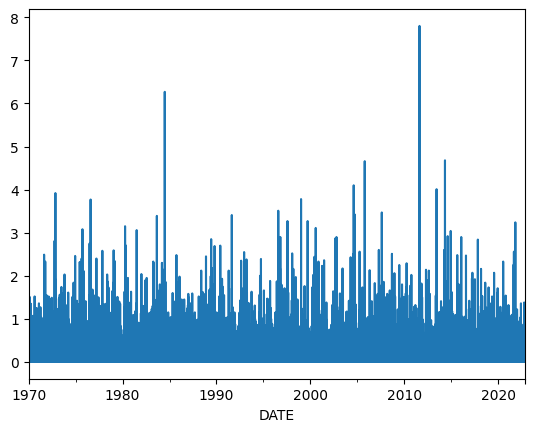

In [33]:
core_weather["PRCP"].plot()

<Axes: xlabel='DATE'>

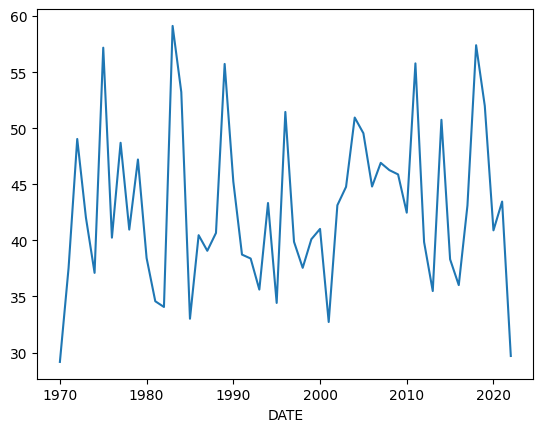

In [35]:
core_weather.groupby(core_weather.index.year).apply(lambda x: x["PRCP"].sum()).plot()

In [36]:
core_weather["target"] = core_weather.shift(-1)["TMAX"]
core_weather

,STATION,NAME,PRCP,TMAX,TMIN,target
DATE,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,28,22,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,31,22,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,38,25,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,31,23,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,35,21,36.0
...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,67,54,58.0
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,58,48,56.0
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,56,43,61.0


In [37]:
core_weather = core_weather.iloc[:-1,:].copy()
core_weather

,STATION,NAME,PRCP,TMAX,TMIN,target
DATE,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,28,22,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,31,22,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,38,25,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,31,23,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,35,21,36.0
...,...,...,...,...,...,...
2022-10-16,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,66,52,67.0
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,67,54,58.0
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,58,48,56.0
